In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sys
sys.path.append("../code")

In [2]:
import loaders.cityprotect as cp

In [3]:
full_df = pd.read_pickle("../data/clean_data/SCCSheriff_2017_2022_inferredCity.pkl")

In [4]:
dept = "Los Altos Hills (SCC Sheriff)"

In [5]:
vc = full_df["inferredCity"].value_counts()

In [6]:
vc[vc > 500]

San Jose               120930
Cupertino               51517
Saratoga                30051
no resolution           20402
Santa Clara              9395
Los Altos Hills          6915
Milpitas                 6676
Sunnyvale                5837
San Martin               5677
Gilroy                   4741
Stanford                 4256
Morgan Hill              4126
Palo Alto                4000
Alum Rock                3272
Mountain View            2881
Los Altos                2408
Los Gatos                2226
East Foothills           1746
Enborg Court             1371
Campbell                 1275
Redwood Estates          1145
Mount Hamilton Road      1074
Loyola                   1049
Uvas Road                 708
United States             664
Buena Vista               636
Rucker                    563
Name: inferredCity, dtype: int64

In [7]:
full_df[full_df["inferredCity"]=="no resolution"]

,ccn,date,updateDate,city,state,postalCode,blocksizedAddress,incidentType,parentIncidentType,narrative,inferredCity
159607,S172130013,2017-08-01 08:07:12,2018-02-13 18:37:49,SANTA CLARA COUNTY,CA,NaN,FY 680,PEDESTRIAN STOP,Proactive Policing,Call Type: 1095 <br>Description: PEDESTRIAN ...,no resolution
159613,S172130026,2017-08-01 09:21:05,2018-02-13 18:37:49,SANTA CLARA COUNTY,CA,NaN,FY 85,RECKLESS DRIVING,Traffic,Call Type: 23103 <br>Description: RECKLESS DR...,no resolution
159616,S172130029,2017-08-01 09:47:27,2018-02-13 18:37:49,SANTA CLARA COUNTY,CA,NaN,FY 85,VEHICLE STOP,Proactive Policing,Call Type: 1195 <br>Description: VEHICLE STO...,no resolution
159621,S172130037,2017-08-01 10:48:12,2018-02-13 18:37:49,SANTA CLARA COUNTY,CA,NaN,100 Block BLOCK HWY 101,"SHOOTING INTO OCC. VEH, DWELLING, OR AIR",Other,Call Type: 246 <br>Description: SHOOTING IN...,no resolution
159623,S172130040,2017-08-01 11:16:48,2018-02-13 18:37:49,SANTA CLARA COUNTY,CA,NaN,FY 280,VEHICLE STOP,Proactive Policing,Call Type: 1195 <br>Description: VEHICLE STO...,no resolution
...,...,...,...,...,...,...,...,...,...,...,...
302379,L223650040,2022-12-31 21:21:31,2023-01-01 09:05:07,SANTA CLARA COUNTY,CA,.,25800 Block SPRINGHILL RD,SERVICE OR AID REQUEST,Other,Call Type: SVC <br>Description: SERVICE OR ...,no resolution
302382,S223650207,2022-12-31 22:24:32,2023-01-01 09:05:07,SANTA CLARA COUNTY,CA,.,1 Block N WHITE RD,FIREARMS DISCHARGED,Other,Call Type: 1057 <br>Description: FIREARMS DI...,no resolution
302385,L223650059,2022-12-31 22:57:19,2023-01-01 09:05:06,SANTA CLARA COUNTY,CA,.,MC KEAN RD,SERVICE OR AID REQUEST,Other,Call Type: SVC <br>Description: SERVICE OR ...,no resolution
302399,L223650080,2022-12-31 23:54:30,2023-01-01 09:05:08,SANTA CLARA COUNTY,CA,.,HWY 17,SERVICE OR AID REQUEST,Other,Call Type: SVC <br>Description: SERVICE OR ...,no resolution


In [8]:
df = full_df[full_df["inferredCity"] == "Los Altos Hills"]
#df=full_df

In [9]:
parentIncident_types = set([a.strip() for b in df['parentIncidentType'].str.split(';').values for a in b])

In [10]:
parentIncident_types

{'Assault',
 'Breaking & Entering',
 'Fire',
 'Other',
 'Proactive Policing',
 'Property Crime',
 'Quality of Life',
 'Sexual Offense',
 'Theft',
 'Theft from Vehicle',
 'Theft of Vehicle',
 'Traffic',
 'Vehicle Recovery'}

In [11]:
monthly = {k: df[df["parentIncidentType"] == k].groupby(pd.Grouper(key="date", freq="M"))
           for k in parentIncident_types}

In [12]:
monthly_df = pd.DataFrame({k: monthly[k].count()["ccn"] for k in parentIncident_types}).fillna(0)

In [13]:
monthly_df

,Other,Sexual Offense,Traffic,Assault,Fire,Theft,Breaking & Entering,Vehicle Recovery,Theft of Vehicle,Proactive Policing,Property Crime,Theft from Vehicle,Quality of Life
date,,,,,,,,,,,,,
2017-08-31,64,0.0,10,0.0,1,3.0,1,0.0,0.0,28,2.0,2.0,18
2017-09-30,67,0.0,14,0.0,0,14.0,3,0.0,0.0,50,3.0,2.0,25
2017-10-31,49,1.0,21,0.0,0,1.0,2,0.0,0.0,37,1.0,0.0,16
2017-11-30,49,0.0,11,0.0,0,5.0,6,0.0,1.0,28,2.0,1.0,10
2017-12-31,51,0.0,7,1.0,0,12.0,1,0.0,0.0,25,8.0,1.0,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-08-31,85,1.0,12,0.0,1,2.0,5,0.0,0.0,2,3.0,0.0,15
2022-09-30,82,0.0,11,0.0,0,10.0,2,0.0,0.0,3,3.0,0.0,17
2022-10-31,74,0.0,8,0.0,0,4.0,7,0.0,0.0,1,2.0,0.0,19


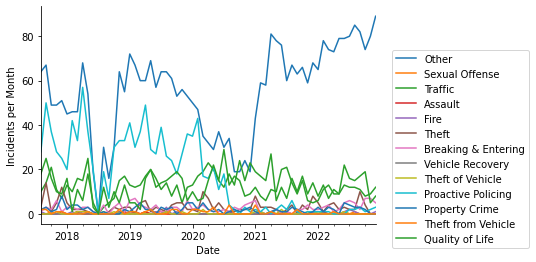

In [14]:
ax = monthly_df.plot()
ax.set(xlabel="Date", ylabel="Incidents per Month")
plt.legend(bbox_to_anchor=(1.05, 0.8), loc='upper left', borderaxespad=0)
sns.despine()

In [15]:
prop_list = ["Breaking & Entering", "Property Crime", "Theft of Vehicle", "Theft from Vehicle", "Theft"]

In [16]:
violent_list = ["Assault", "Robbery", "Sexual Offense"]

In [17]:
monthly_df.columns.intersection(violent_list)

Index(['Sexual Offense', 'Assault'], dtype='object')

In [18]:
from datetime import datetime

In [19]:
approval_date = [datetime(year=2021, month=4, day=15), datetime(year=2021, month=4, day=15)]
installed_date = [datetime(year=2022, month=2, day=1), datetime(year=2022, month=2, day=1)]
yvals= [0,7]

In [20]:
daterange = [monthly_df.index.min(), monthly_df.index.max()]

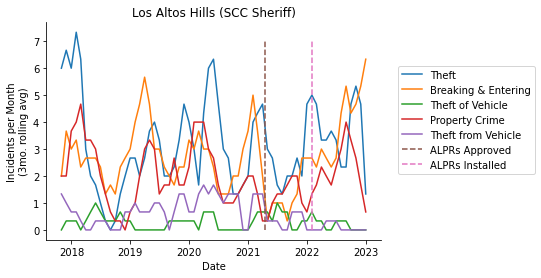

In [21]:
fig, ax = plt.subplots()
cols_to_use = monthly_df.columns.intersection(prop_list)
ax.plot(monthly_df[cols_to_use].rolling(window=3).mean(), label=cols_to_use)
ax.plot(approval_date, yvals, linestyle="dashed", label="ALPRs Approved")
ax.plot(installed_date, yvals, linestyle="dashed", label="ALPRs Installed")
ax.set(xlabel="Date", ylabel="Incidents per Month\n(3mo. rolling avg)")
ax.set(title=dept)
plt.legend(bbox_to_anchor=(1.05, 0.8), loc='upper left', borderaxespad=0)
sns.despine()


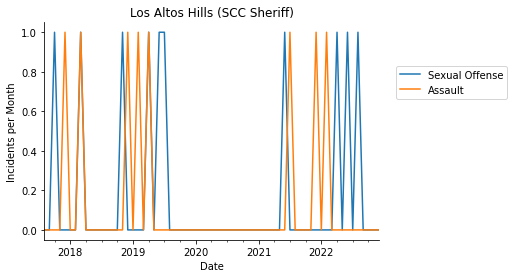

In [22]:
ax = monthly_df[monthly_df.columns.intersection(violent_list)].plot()
ax.set(xlabel="Date", ylabel="Incidents per Month")
ax.set(title=dept)
plt.legend(bbox_to_anchor=(1.05, 0.8), loc='upper left', borderaxespad=0)
sns.despine()

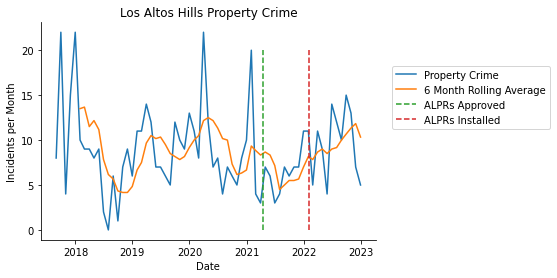

In [23]:
yvals= [0,20]
fig, ax = plt.subplots()
ax.plot(monthly_df[monthly_df.columns.intersection(prop_list)].sum(axis=1), label="Property Crime")
ax.plot(monthly_df[monthly_df.columns.intersection(prop_list)].sum(axis=1).rolling(window=6).mean(), label="6 Month Rolling Average")
ax.plot(approval_date, yvals, linestyle="dashed", label="ALPRs Approved")
ax.plot(installed_date, yvals, linestyle="dashed", label="ALPRs Installed")
ax.set(xlabel="Date", ylabel="Incidents per Month")
ax.set(title="Los Altos Hills Property Crime")
plt.legend(bbox_to_anchor=(1.05, 0.8), loc='upper left', borderaxespad=0)
sns.despine()
fig.savefig("Los Altos Hills Crime Rate.png", bbox_inches="tight")

In [24]:
parentIncident_types

{'Assault',
 'Breaking & Entering',
 'Fire',
 'Other',
 'Proactive Policing',
 'Property Crime',
 'Quality of Life',
 'Sexual Offense',
 'Theft',
 'Theft from Vehicle',
 'Theft of Vehicle',
 'Traffic',
 'Vehicle Recovery'}

In [25]:
incident_types = set([a.strip() for b in df['incidentType'].str.split(';').values for a in b])

In [26]:
incident_types

{'ABANDONED OR FOUND BICYCLE',
 'ABANDONED VEHICLE',
 'ABANDONED VEHICLE, BLOCKING DRIVEWAY',
 'ALARM',
 'ALARM, AUDIBLE',
 'ALARM, SILENT',
 'ANIMAL BITE',
 'ANIMAL COMPLAINT',
 'ASSAULT',
 'ASSAULT AND BATTERY',
 'BRANDISHING A WEAPON',
 'BURGLARY (460)',
 "CORONER'S CASE",
 'COUNTY ORDINANCE',
 'CRIMINAL THREATS',
 'CRUELTY TO ANIMALS',
 'DEAD ANIMAL',
 'DEFRAUDING AN INNKEEPER',
 'DISTURBANCE',
 'DISTURBANCE, EXCESSIVE NOISE',
 'DISTURBANCE, FAMILY',
 'DISTURBANCE, FIGHT',
 'DISTURBANCE, FIRECRACKERS',
 'DISTURBANCE, JUVENILE',
 'DISTURBANCE, MUSIC',
 'DISTURBANCE, NEIGHBOR',
 'DISTURBANCE, UNKNOWN',
 'DISTURBANCE, WEAPON',
 'DISTURNACE, PARTY',
 'DOMESTIC VIOLENCE',
 'DRUNK IN PUBLIC',
 'EXPLOSION',
 'FEMALE CALLING FOR HELP',
 'FIRE ALARM/SMOKE DETECT',
 'FIRE, SPECIFY TYPE',
 'FIREARMS DISCHARGED',
 'FLAG DOWN',
 'FOOT PATROL',
 'FORGERY',
 'FOUND PROPERTY',
 'FOUND, MISSING PERSON',
 'GRAND THEFT',
 'HANDICAPPED PARKING VIOLATION',
 'HIT AND RUN  PROPERTY DAMAGE ONLY',
 'IDENTI

In [28]:
import re

In [29]:
reg=re.compile('BURGLARY')
burglary_types = list(filter(reg.search, incident_types))

In [30]:
burg_monthly = {k: df[df["incidentType"] == k].groupby(pd.Grouper(key="date", freq="Y")) for k in burglary_types}
burg_monthly_df = pd.DataFrame({k: burg_monthly[k].count()["ccn"] for k in burglary_types}).fillna(0)

In [31]:
burg_monthly_df

,BURGLARY (460),VEHICLE BURGLARY
date,,
2017-12-31,13,6
2018-12-31,28,3
2019-12-31,41,9
2020-12-31,30,13
2021-12-31,20,7
2022-12-31,49,1
